# Done by William

#### Objectives:
The goal of this notebook is to determine the statistical signifance and rigity of the User 1 and 2 step data. This will segway into our analysis and justify why our findings can be considered valid.

#### Reviewing the Data
We initialise our agreed upon dataset format (courtesy of Serena and Martin) to understand what we will need to analyse

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import calendar
import os
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()

In [2]:
#user1_raw_data = pd.read_csv("data/User1.csv")
#user2_raw_data = pd.read_csv("data/User2.csv")
user1_raw_data = pd.read_csv("User1.csv")
user2_raw_data = pd.read_csv("User2.csv")

A cleaning function is used to remove the diplicates we identified in Compiled_WK8_EDA.ipynb. 

I have also created a function that would add date and hour features.

In [3]:
#Re-using Code from Serena
def clean_user(raw_df):
    raw_df['Start'] = pd.to_datetime(raw_df['Start'], format='%d-%b-%Y %H:%M')
    raw_df['Finish'] = pd.to_datetime(raw_df['Finish'], format='%d-%b-%Y %H:%M')
    start_counts_3 = raw_df['Start'].value_counts()
    multicounts_3 = start_counts_3[start_counts_3 > 1]
    
    raw_df = raw_df[~ (raw_df['Start'].isin(multicounts_3.index.values) & 
        raw_df['Finish'].isin(multicounts_3.index.values) )]
    
    return raw_df

def convert_date_time(raw_df):
    raw_df = raw_df.copy()
    raw_df['Date'] = raw_df['Start'].dt.date
    raw_df['Start Time'] = raw_df['Start'].dt.time
    raw_df['End Time'] = raw_df['Finish'].dt.time
    
    return raw_df

We run our datasets through this function

In [4]:
user1_df = clean_user(user1_raw_data)
user1_df = convert_date_time(user1_df)
user2_df = clean_user(user2_raw_data)
user2_df = convert_date_time(user2_df)

We check user 1 and user 2 datasets respectively to see if there are any issues, and solve accordingly

*User 1*

In [5]:
user1_df.head(5)

,Start,Finish,Steps (count),Date,Start Time,End Time
0,2014-12-07 09:00:00,2014-12-07 10:00:00,941.0,2014-12-07,09:00:00,10:00:00
1,2014-12-07 10:00:00,2014-12-07 11:00:00,408.0,2014-12-07,10:00:00,11:00:00
2,2014-12-07 11:00:00,2014-12-07 12:00:00,157.0,2014-12-07,11:00:00,12:00:00
3,2014-12-07 12:00:00,2014-12-07 13:00:00,1017.0,2014-12-07,12:00:00,13:00:00
4,2014-12-07 13:00:00,2014-12-07 14:00:00,0.0,2014-12-07,13:00:00,14:00:00


In [6]:
user1_df.describe()

,Steps (count)
count,42071.000000
mean,203.166984
std,517.184845
min,0.000000
25%,0.000000
50%,0.000000
75%,122.932806
max,7204.611321


In [7]:
user1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42071 entries, 0 to 42075
Data columns (total 6 columns):
Start            42071 non-null datetime64[ns]
Finish           42071 non-null datetime64[ns]
Steps (count)    42071 non-null float64
Date             42071 non-null object
Start Time       42071 non-null object
End Time         42071 non-null object
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 2.2+ MB


In [8]:
user1_df.dtypes

Start            datetime64[ns]
Finish           datetime64[ns]
Steps (count)           float64
Date                     object
Start Time               object
End Time                 object
dtype: object

For user 1, we have no null values, our data types are in the desired format and what is shown properly reflects the initial CSV file.

*User 2*

In [9]:
user2_df.head(5)

,Start,Finish,Steps (count),Date,Start Time,End Time
0,2014-11-29 00:00:00,2014-11-29 01:00:00,502.666667,2014-11-29,00:00:00,01:00:00
1,2014-11-29 01:00:00,2014-11-29 02:00:00,502.666667,2014-11-29,01:00:00,02:00:00
2,2014-11-29 02:00:00,2014-11-29 03:00:00,502.666667,2014-11-29,02:00:00,03:00:00
3,2014-11-29 03:00:00,2014-11-29 04:00:00,502.666667,2014-11-29,03:00:00,04:00:00
4,2014-11-29 04:00:00,2014-11-29 05:00:00,502.666667,2014-11-29,04:00:00,05:00:00


In [10]:
user2_df.describe()

,Steps (count)
count,42272.000000
mean,415.899515
std,726.094524
min,0.000000
25%,0.000000
50%,177.878115
75%,479.318182
max,7261.816867


In [11]:
user2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42272 entries, 0 to 42276
Data columns (total 6 columns):
Start            42272 non-null datetime64[ns]
Finish           42272 non-null datetime64[ns]
Steps (count)    42272 non-null float64
Date             42272 non-null object
Start Time       42272 non-null object
End Time         42272 non-null object
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 2.3+ MB


In [12]:
user2_df.dtypes

Start            datetime64[ns]
Finish           datetime64[ns]
Steps (count)           float64
Date                     object
Start Time               object
End Time                 object
dtype: object

For user 2 we also have no null values, our data types are in the desired format and what is shown properly reflects the initial CSV file.

#### Conducting Basic Exploratory Data Analysis
To get a feel for the data, and identify any obvious trends, we utilise datetime format 

3 areas of interest in time series data are as follows: 
- **Trend**: Upward & downward movement of the data with time over a larger period of time 
- **Seasonality**: Seasonaal variance (areas of increased step count)
- **Noise**: Spikes & troughs at random intervals in step count

### Time Series Forecasting

#### AutoRegressive Integrated Moving Average (ARIMA)
Based off Jeremy's work, and my own research on ARIMA, the purpose of this section is to conduct time series forecasting on User 1 and User 2 datasets to predict what future step count values they would take.

This is **important**, since we are making the assumption that humans follow routines, and that repetitive past behaviour would be reflected in future behaviour. Given that our driving question is to determine different ways to calculate 10-hrs of steps, using ARIMA allows for us to remove "random white noise" and based off the prediction (ie. guesstimates of step counts in the future), and compare it against the Althoff et al (2017) calculation of step counts.  

This will greatly inform if our other appraoches are correct, and will be used as the basic comparison to our smaller, less stasticially signifiance (ie. less data points) collected datasets.

Reference Materials:
- [ARIMA Model Python Example - Time Series Forecasting](https://towardsdatascience.com/machine-learning-part-19-time-series-and-autoregressive-integrated-moving-average-model-arima-c1005347b0d7)
- [ARIMA Model - Complete Guide to Time Series Forecasting in Python](https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/)

**Step 0**: Preparing the Data for Analysis

We only need the date and daily step data for the analysis

*User 1*

In [13]:
df1 = pd.DataFrame()
df1['Date'] = pd.to_datetime(user1_df['Date'])
df1['Steps'] = user1_df['Steps (count)']
daily_step_data1 = df1.groupby('Date').sum().round(2)
daily_step_data1.head(5)

,Steps
Date,
2014-12-07,2693.0
2014-12-08,6567.0
2014-12-09,6879.0
2014-12-10,7845.0
2014-12-11,916.0


A simple graph to see initial state of User 1 daily steps

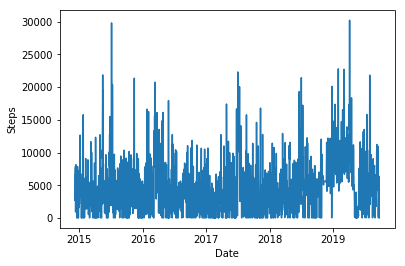

In [14]:
plt.plot(daily_step_data1)
plt.xlabel('Date')
plt.ylabel('Steps')
plt.show()

*User 2*

In [15]:
df2 = pd.DataFrame()
df2['Date'] = pd.to_datetime(user2_df['Date'])
df2['Steps'] = user2_df['Steps (count)']
daily_step_data2 = df2.groupby('Date').sum().round(2)
daily_step_data2.head(5)

,Steps
Date,
2014-11-29,21427.00
2014-11-30,4321.61
2014-12-01,10473.11
2014-12-02,15784.72
2014-12-03,2783.60


A simple graph to see initial state of User 2 daily steps

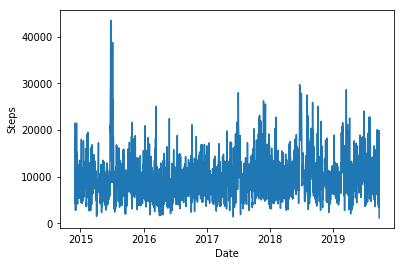

In [16]:
plt.plot(daily_step_data2)
plt.xlabel('Date')
plt.ylabel('Steps')
plt.show()

**Step 1**: Ensuring that User 1 and User 2 data is stationary. 

The **rationale** is that if a time series is stationary and has a particular behaviour over a given time interval, it is safe to assume that it will have same behaviour at some later point in time.

In other words, the mean and covariance of the series should not be a function of time. Likewise, the covariance of the ith term and the (i+m)th term should not be a function of time. 

*Test 1: Rolling Statistics*

We utilise a 10-day rolling average to average out the end-of-day step count for the first 10 days as the first data point, and so on.

**User 1**

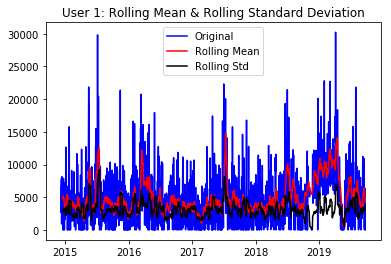

In [17]:
rolling_mean1 = daily_step_data1.rolling(window = 12).mean()
rolling_std1 = daily_step_data1.rolling(window = 12).std()
plt.plot(daily_step_data1, color = 'blue', label = 'Original')
plt.plot(rolling_mean1, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std1, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('User 1: Rolling Mean & Rolling Standard Deviation')
plt.show()

As you can see, the rolling mean and rolling standard deviation are not constant with time. They are not straight and are not parallel to the x-axis.

Therefore, the time series is not stationary.

**User 2**

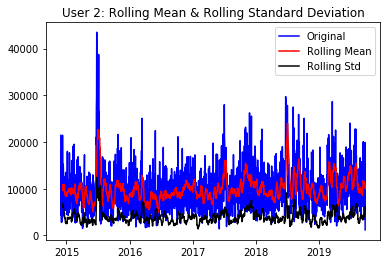

In [18]:
rolling_mean2 = daily_step_data2.rolling(window = 12).mean()
rolling_std2 = daily_step_data2.rolling(window = 12).std()
plt.plot(daily_step_data2, color = 'blue', label = 'Original')
plt.plot(rolling_mean2, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std2, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('User 2: Rolling Mean & Rolling Standard Deviation')
plt.show()

As you can see, the rolling mean and rolling standard deviation are not constant with time. They are not straight and are not parallel to the x-axis.

Therefore, the time-series is not stationary.

*Test 2: Augmented Dicker-Fuller Test*

The time series is considered stationary if the p-value is low (according to the null hypothesis) and the critical values at 1%, 5%, 10% confidence intervals are as close as possible to the ADF Statistics

[Further Reading](https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/) 

**User 1**

In [19]:
result = adfuller(daily_step_data1['Steps'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -5.741423535843838
p-value: 6.262625678653687e-07
Critical Values:
	1%: -3.4341159453366448
	5%: -2.863203454843483
	10%: -2.5676555752134256


The ADF Statistic is lower than the critical values, and that the p-value is smaller than the threshold 0.05. Thus, we conclude that the time series is stationary. 

**User 2**

In [20]:
result = adfuller(daily_step_data2['Steps'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -7.351080987240036
p-value: 1.0056034920539443e-10
Critical Values:
	1%: -3.4341116127463858
	5%: -2.863201542300677
	10%: -2.567654556829725


The ADF Statistic is lower than the critical values, amd that the p-value is smaller than the threshold 0.05. Thus, we conclude that the time series is stationary. 

**Creating a function** to run the two tests to determine whether a given time series is stationary

In [21]:
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries['Steps'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

#### Methods to make time series data stationary
- Method 1: Take the log of the series
- Method 2: Differencing the series

This is important since stationarizing the time series data will remove removes any persistent autocorrelation, thereby making the predictors(lags of the series) in the forecasting ARIMA models (which is essenitally a linear regression) nearly independent.

#### Method 1
Using **method 1**, we are aiming to make the time series data staionary for User 1 and User 2.

*User 1*

We take the log our daily step data, but put a filter function as we cannot log days where there are no steps. 

Log is used since it lowers the rate at which rolling mean moves. 

We *aim* to compare different transformation approaches for Method 1 to determine the best 'technique' for future analysis. 

In [22]:
log_daily_step_data1 = np.log(daily_step_data1, where = (daily_step_data1 > 0))

**Transformation 1**

Graphically plot and use our function to determine if it is stationary. This is by subtracting our log data from our rolling mean.

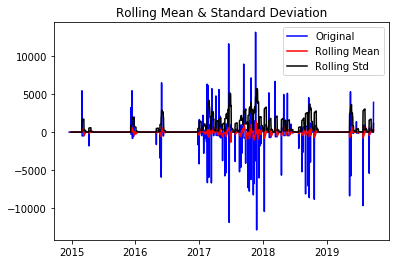

ADF Statistic: -12.747576619320625
p-value: 8.67336318440428e-24
Critical Values:
	1%: -3.4341642709947586
	5%: -2.8632247871349015
	10%: -2.567666934183466


In [23]:
rolling_mean_st1 = log_daily_step_data1.rolling(window=12).mean()
df_log_minus_mean1 = log_daily_step_data1 - rolling_mean_st1
df_log_minus_mean1.dropna(inplace=True)
get_stationarity(df_log_minus_mean1)

The p-value is below the threshold of 0.05, amd the ADF statisitc is lower than any of the critical values. We reject the null hypothesis, and infer that the time series is stationary for User 1.

Refering to the diagram, we can see it is relatively horizontal but there is some spike/sharpness throughout 2015 to 2020.

**Transformation 2**

Applying expontential decay to check if stationary

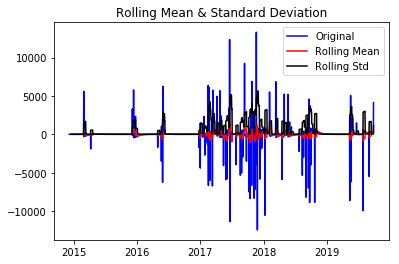

ADF Statistic: -12.777491340152656
p-value: 7.538751600969266e-24
Critical Values:
	1%: -3.4341224629678426
	5%: -2.863206331927479
	10%: -2.5676571071932934


In [24]:
rolling_mean_exp_decay1 = log_daily_step_data1.ewm(halflife=12, min_periods=0, adjust=True).mean()
df_log_exp_decay1 = log_daily_step_data1 - rolling_mean_exp_decay1
df_log_exp_decay1.dropna(inplace=True)
get_stationarity(df_log_exp_decay1)

Compared to subtracting the rolling mean, this transformation performed worse in terms of ADF Statistic. However, in terms of number of spikes, it is less, and thus, considered more stationary.

**Transformation 3**

Using time shifting, we subtract evrry point by the one that preceded it

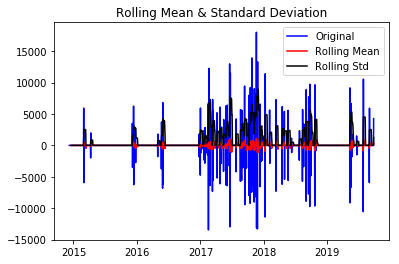

ADF Statistic: -16.981524549841467
p-value: 9.005001562187067e-30
Critical Values:
	1%: -3.434133375964546
	5%: -2.8632111492477503
	10%: -2.5676596723058402


In [25]:
df_log_shift1 = log_daily_step_data1 - log_daily_step_data1.shift()
df_log_shift1.dropna(inplace=True)
get_stationarity(df_log_shift1)

Compared to subtracting the rolling mean, this transformation performed worse in terms of ADF Statistic. However, in terms of number of spikes, it is less, and thus, considered more stationary.

*User 2*

We take the log our daily step data, but put a filter function as we cannot log days where there are no steps. 

Log is used since it lowers the rate at which rolling mean moves.

As in User 1, we try different transformations to find the one with the best statioanry result.

In [26]:
log_daily_step_data2 = np.log(daily_step_data2, where = (daily_step_data2 > 0))

Graphically plot and use our function to determine if it is stationary.

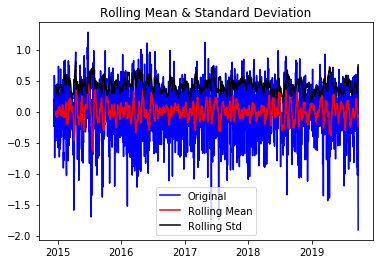

ADF Statistic: -12.399745628731685
p-value: 4.589168235701396e-23
Critical Values:
	1%: -3.4341465551936534
	5%: -2.863216966926812
	10%: -2.567662770090317


In [27]:
rolling_mean_st2 = log_daily_step_data2.rolling(window=12).mean()
df_log_minus_mean2 = log_daily_step_data2 - rolling_mean_st2
df_log_minus_mean2.dropna(inplace=True)
get_stationarity(df_log_minus_mean2)

The p-value is below the threshold of 0.05, and the ADF statisitc is lower than any of the critical values. We reject the null hypothesis, and infer that the time series is stationary for User 2. 

Refering to the diagram, we can see it that there are quite a lot of spike/sharpness throughout 2015 to 2020.


**Transformation 2**

Applying expontential decay to check if stationary

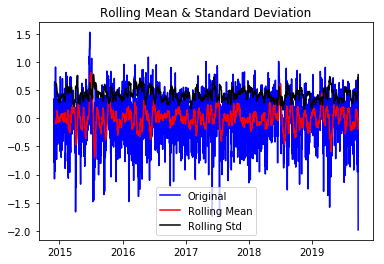

ADF Statistic: -10.328724974490106
p-value: 2.8797804295210715e-18
Critical Values:
	1%: -3.4341137777946718
	5%: -2.8632024980220288
	10%: -2.56765506572863


In [28]:
rolling_mean_exp_decay2 = log_daily_step_data2.ewm(halflife=12, min_periods=0, adjust=True).mean()
df_log_exp_decay2 = log_daily_step_data2 - rolling_mean_exp_decay2
df_log_exp_decay2.dropna(inplace=True)
get_stationarity(df_log_exp_decay2)

Compared to subtracting the rolling mean, this transformation performed better. In other words the ADF statistic is closer to the critical values. Also, in terms of number of spikes, it is less, and thus, can be considered more stationary.

**Transformation 3**

Using time shifting, we subtract evrry point by the one that preceded it

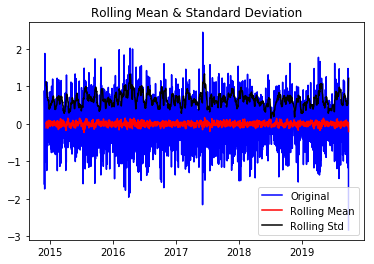

ADF Statistic: -14.450729370512299
p-value: 7.105743733193172e-27
Critical Values:
	1%: -3.4341116127463858
	5%: -2.863201542300677
	10%: -2.567654556829725


In [29]:
df_log_shift2 = log_daily_step_data2 - log_daily_step_data2.shift()
df_log_shift2.dropna(inplace=True)
get_stationarity(df_log_shift2)

Compared to subtracting the rolling mean, this transformation performed worse in terms of ADF Statistic. However, in terms of number of spikes, it is less, and thus, considered more stationary.

**Conclusion**

Transformation 3 provided a more horizontal looking rolling meaan. This is considered more stationary, and would be the preferred appraoch for Method 1.

#### Method 2

Using **method 2**, we are aiming to make the time series data staionary for User 1 and User 2.

Essentially, we use differencing, which subtracts the current value from the previous, to transform a time series into one that’s stationary.

Note, three integers (p, d, q) are typically used to parametrize ARIMA models.
- p: number of autoregressive terms (AR order)
- d: number of nonseasonal differences (differencing order)
- q: number of moving-average terms (MA order)

**Part A**

To find the order of differencing (d) in the ARIMA model, ie. the minimum differencing required to get a near-stationary series which roams around a defined mean and the ACF plot reaches to zero fairly quick, we first use the ADF test (*test 2*) to find if the time series is indeed stationary. 

Given that it is stationary, we conclude no differencing is needed, that is, d=0. BUT we will still attemp differentiation none the less.

*User 1*

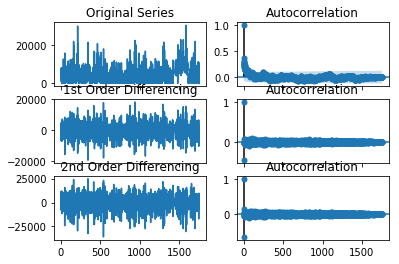

In [30]:
fig, axes = plt.subplots(3, 2, sharex=True)
steps_array1 = daily_step_data1.values
d1_diff1 = np.diff(steps_array1, axis = 0)
d2_diff1 = np.diff(steps_array1,n=2, axis = 0)
axes[0, 0].plot(steps_array1); axes[0, 0].set_title('Original Series')
plot_acf(steps_array1, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(d1_diff1); axes[1, 0].set_title('1st Order Differencing')
plot_acf(pd.DataFrame(d1_diff1).dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(d2_diff1); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(pd.DataFrame(d2_diff1).dropna(), ax=axes[2, 1])

plt.show()

From the above series, the time series autocorrelation is the same for the two orders of differencing. Likewise, differenting our series yield similar patterns/trends to what we initially had.

*User 2*

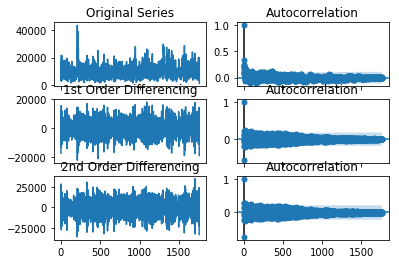

In [31]:
fig, axes = plt.subplots(3, 2, sharex=True)
steps_array2 = daily_step_data2.values
d1_diff2 = np.diff(steps_array2, axis = 0)
d2_diff2 = np.diff(steps_array2,n=2, axis = 0)
axes[0, 0].plot(steps_array2); axes[0, 0].set_title('Original Series')
plot_acf(steps_array2, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(d1_diff2); axes[1, 0].set_title('1st Order Differencing')
plot_acf(pd.DataFrame(d1_diff2).dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(d2_diff2); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(pd.DataFrame(d2_diff2).dropna(), ax=axes[2, 1])

plt.show()

From the above series, the time series autocorrelation is the same for the two orders of differencing. Likewise, differenting our series yield similar patterns/trends to what we initially had.

**Conclusion**

We can safely say we do not need to differentiate. Hence d = 0 for both User 1 and User 2

**Auto Correlation Function (ACF)**

The correlation between the observations at the current point in time and the observations at all previous points in time. We can use ACF to determine the optimal number of MA terms. The number of terms determines the order of the model.

[Further Reading on ACF](https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/)

Regardless, examing the autocorrelation plot for **User 1 daily step count**

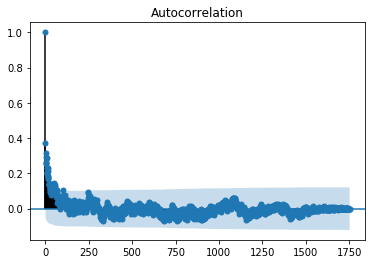

In [32]:
plot_acf(daily_step_data1)
plt.show()

We know that the ACF describes the autocorrelation between an observation and another observation at a prior time step that includes direct and indirect dependence information.

This means we would expect the ACF for the AR(k) time series to be strong to a lag of k and the inertia of that relationship would carry on to subsequent lag values, trailing off at some point as the effect was weakened.

Our graph above follows this expected behaviour.

We now limit the number of lags to make the plot easier to read. Because we have used a moving average in our Method 1, it would be interesting to limit it to the first 50 lags that occured. This will show a **partial autocorrelation function (PACF)**. The PACF only describes the direct relationship between an observation and its lag.

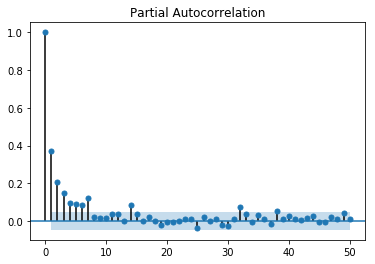

In [33]:
plot_pacf(daily_step_data1, lags=50)
plt.show()

Accordingly, we expect for the PACF that there would be no correlation for lag values beyond 50. This is true

We now examine the autocorrelation plot for **User 2 daily step count**

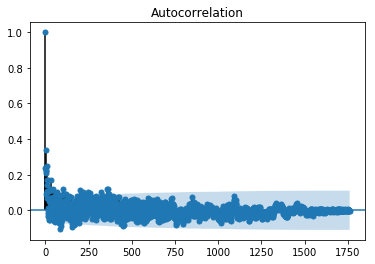

In [34]:
plot_acf(daily_step_data2)
plt.show()

Our graph above follows this expected behaviour of an ACF.

Examing our PACF, with the same limit of 50, we observe the following:

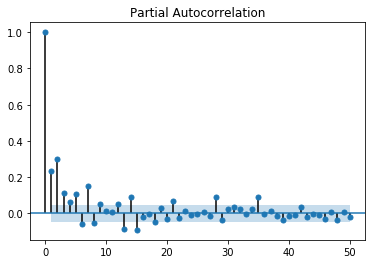

In [35]:
plot_pacf(daily_step_data2, lags=50)
plt.show()

Accordingly, we observe that there are no correlation for lag values beyond 50. This is true

These ACF and PACF findings indicate that our series is stationary, statistically sound, and that our d = 0

**Part B**

To find the order of the AR term (p) in the ARIMA model, we inspect the PACF plot above. The PACF conveys the pure correlation between a lag and the series. That way, examing the PACF will let me know if that lag is needed in the AR term or not. 

*User 1*

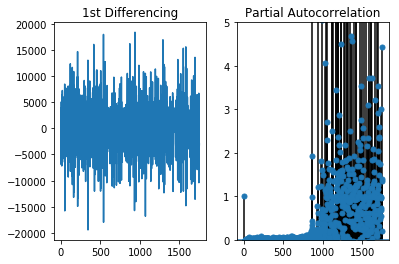

In [46]:
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(d1_diff1); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(pd.DataFrame(d1_diff1).dropna(), ax=axes[1])

plt.show()

We observe that the PACF lag 1 is quite significant since it is well above the significance line.

I am going to be conservative and tentatively fix the p as 1 for User 1.

*User 2*

Repeating this for User 2

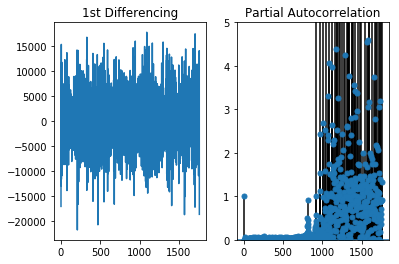

In [47]:
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(d1_diff2); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(pd.DataFrame(d1_diff2).dropna(), ax=axes[1])

plt.show()

We observe that the PACF lag 1 is quite significant since it is well above the significance line.

I am going to be conservative and tentatively fix the p as 1 for User 2.

**Part C**

To find the order of the MA term (q) in the ARIMA model, we inspect the ACF plot above. An MA term is technically, the error of the lagged forecast.

*User 1*

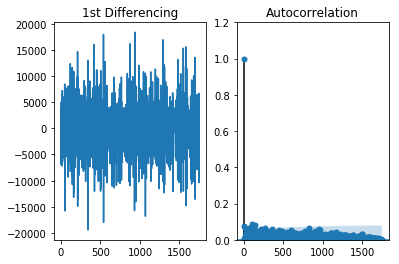

In [48]:
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(d1_diff1); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(pd.DataFrame(d1_diff1).dropna(), ax=axes[1])

plt.show()

We notice how our lags are largely within the signifiance line. We use a conservative estimate of q as 1 for User 1 data.

*User 2*

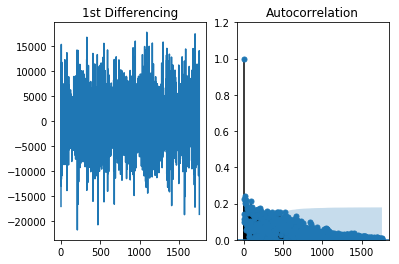

In [49]:
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(d1_diff2); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(pd.DataFrame(d1_diff2).dropna(), ax=axes[1])

plt.show()

We notice how our lags are largely within the signifiance line. We use a conservative estimate of q as 1 for User 2 data.

#### Building the ARIMA Model
Having found the input parameters, we now have everything we need to fit the ARIMA model

*User 1*

In [50]:
# 1,0,1 ARIMA Model
model1 = ARIMA(steps_array1, order=(1,0,1))
model_fit1 = model1.fit(disp=0)
print(model_fit1.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1754
Model:                     ARMA(1, 1)   Log Likelihood              -16840.799
Method:                       css-mle   S.D. of innovations           3576.977
Date:                Wed, 04 Nov 2020   AIC                          33689.597
Time:                        15:17:31   BIC                          33711.476
Sample:                             0   HQIC                         33697.684
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4873.1118    362.800     13.432      0.000    4162.038    5584.186
ar.L1.y        0.9485      0.013     74.218      0.000       0.923       0.974
ma.L1.y       -0.7795      0.027    -28.826      0.0

From the model summary, we receive a lot of information. 

The table in the middle is the coefficients table where the values under ‘coef’ are the weights of the respective terms. 

We notice how the coef of the MA1 term is -0.7795, and the P-Value in 'P>|z|' column is highly significant. It is less than 0.05.

However, the AIC is extremely high, so it is not a good fit.

We now reattempt our calculations with the aim of reducing AIC. We increase our p value to account for the significant lags in our auto regression, but maintain our q.

In [51]:
# 5,0,1 ARIMA Model
model3 = ARIMA(steps_array1, order=(5,0,1))
model_fit3 = model3.fit(disp=0)
print(model_fit3.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1754
Model:                     ARMA(5, 1)   Log Likelihood              -16836.291
Method:                       css-mle   S.D. of innovations           3567.771
Date:                Wed, 04 Nov 2020   AIC                          33688.582
Time:                        15:17:32   BIC                          33732.340
Sample:                             0   HQIC                         33704.756
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4873.1118    405.140     12.028      0.000    4079.051    5667.173
ar.L1.y        1.0563      0.051     20.581      0.000       0.956       1.157
ar.L2.y       -0.0711      0.036     -1.973      0.0

Doing so only slightly improves our goodness of fit (AIC), so we keep our original 1,0,1 ARIMA model

*User 2*

We repeat for User 2

In [52]:
# 1,0,1 ARIMA Model
model2 = ARIMA(steps_array2, order=(1,0,1))
model_fit2 = model2.fit(disp=0)
print(model_fit2.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1762
Model:                     ARMA(1, 1)   Log Likelihood              -17281.447
Method:                       css-mle   S.D. of innovations           4397.668
Date:                Wed, 04 Nov 2020   AIC                          34570.894
Time:                        15:17:33   BIC                          34592.791
Sample:                             0   HQIC                         34578.986
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9977.8117    302.468     32.988      0.000    9384.985    1.06e+04
ar.L1.y        0.9078      0.018     51.484      0.000       0.873       0.942
ma.L1.y       -0.7327      0.028    -26.378      0.0

We notice how the coef of the MA1 term is -0.7327, and the P-Value in 'P>|z|' column is highly significant. It is less than 0.05.

However, the AIC is extremely high, so it is not a good fit.

We now reattempt our calculations with the aim of reducing AIC. We increase our p value to account for the significant lags in our auto regression, but maintain our q.

In [53]:
# 5,0,1 ARIMA Model
model4 = ARIMA(steps_array2, order=(5,0,1))
model_fit4 = model4.fit(disp=0)
print(model_fit4.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1762
Model:                     ARMA(5, 1)   Log Likelihood              -17248.200
Method:                       css-mle   S.D. of innovations           4315.272
Date:                Wed, 04 Nov 2020   AIC                          34512.401
Time:                        15:17:33   BIC                          34556.194
Sample:                             0   HQIC                         34528.584
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9977.8116    253.398     39.376      0.000    9481.161    1.05e+04
ar.L1.y       -0.5367      0.054     -9.928      0.000      -0.643      -0.431
ar.L2.y        0.3342      0.027     12.158      0.0

Doing so only slightly improves our goodness of fit (AIC), so we keep our original 1,0,1 ARIMA model

**Plotting of Residuals**

To ensure there are no patterns

*User 1*

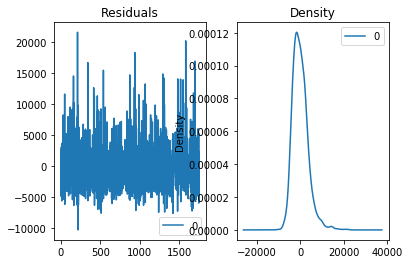

In [54]:
residuals1 = pd.DataFrame(model_fit1.resid)
fig, ax = plt.subplots(1,2)
residuals1.plot(title="Residuals", ax=ax[0])
residuals1.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

The residual errors seem fine with near zero mean and uniform variance.

Now, we plot the actuals against the fitted values using plot_predict().

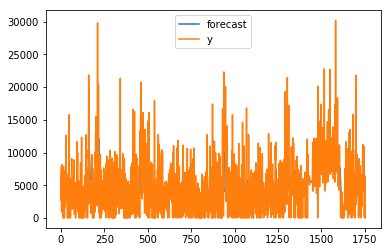

In [57]:
model_fit1.plot_predict(dynamic=False)
plt.show()

As you can see, the fitted forecast and actuals look artifically good. There seems to be near perfect overlap of actual vs forecast.

*User 2*

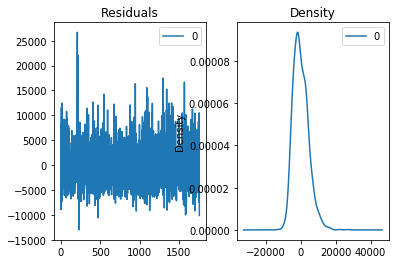

In [58]:
residuals2 = pd.DataFrame(model_fit2.resid)
fig, ax = plt.subplots(1,2)
residuals2.plot(title="Residuals", ax=ax[0])
residuals2.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

The residual errors seem fine with near zero mean and uniform variance.

Now, we plot the actuals against the fitted values using plot_predict().

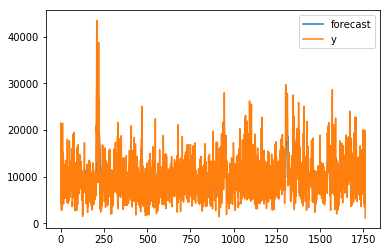

In [59]:
model_fit2.plot_predict(dynamic=False)
plt.show()

As you can see, the fitted forecast and actuals look artifically good. There seems to be near perfect overlap of actual vs forecast.

**Conclusion**

We have a decent ARIMA model that has been trained. We now can begin the forecasting

#### Optimal ARIMA Model
Using Out-of-Time Cross Valudation.

Requires training and testing dataset by splitting the time series into 2 contiguous parts in approximately 75:25 ratio or a reasonable proportion based on time frequency of series.

*User 1*

In [89]:
#Create Training and Test
train1 = steps_array1[:1315]
test1 = steps_array1[1315:]

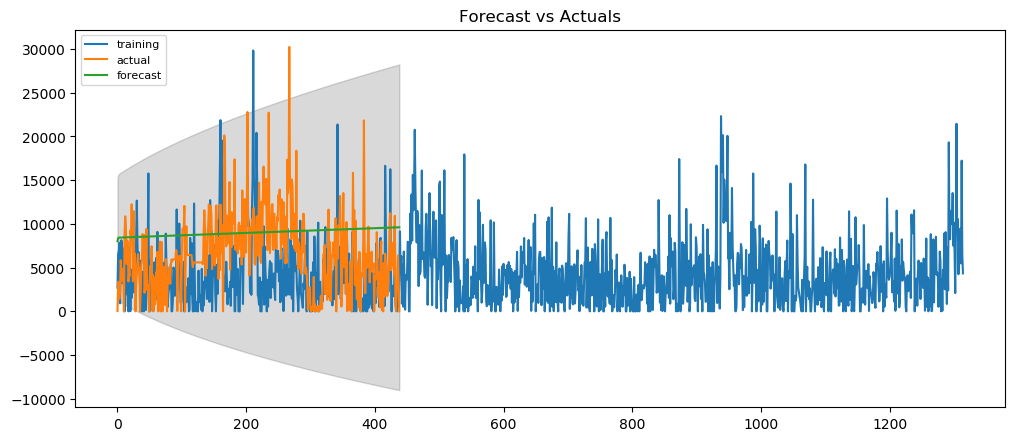

In [95]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model_user1 = ARIMA(train1, order=(1, 1, 1))  
fitted1 = model_user1.fit(disp=-1)  

# Forecast
fc1, se1, conf1 = fitted1.forecast(439, alpha=0.05)  # 95% conf

# Make as pandas series
fc1_series = pd.Series(fc1, index=pd.DataFrame(test1).index)
lower_series1 = pd.Series(conf1[:, 0], index=pd.DataFrame(test1).index)
upper_series1 = pd.Series(conf1[:, 1], index=pd.DataFrame(test1).index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train1, label='training')
plt.plot(test1, label='actual')
plt.plot(fc1_series, label='forecast')
plt.fill_between(lower_series1.index, lower_series1, upper_series1, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

*User 2*

In [97]:
#Create Training and Test
train2 = steps_array2[:1321]
test2 = steps_array2[1321:]

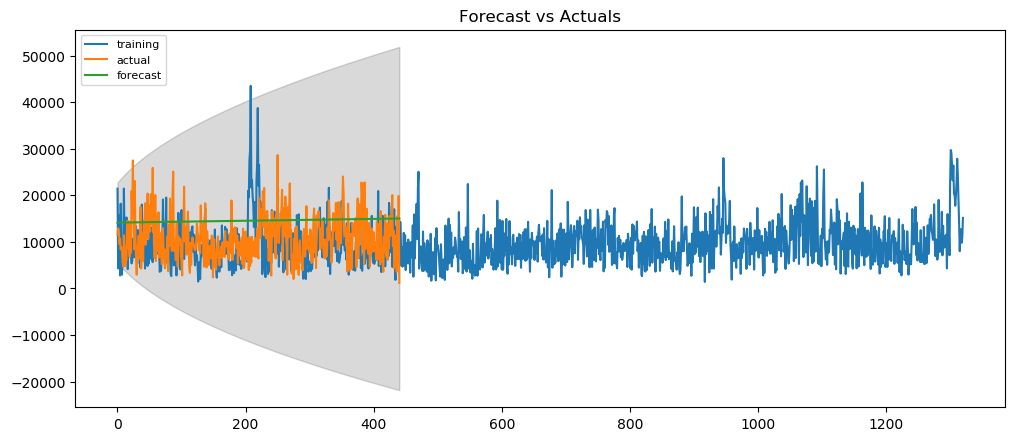

In [98]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model_user2 = ARIMA(train2, order=(1, 1, 1))  
fitted2 = model_user2.fit(disp=-1)  

# Forecast
fc2, se2, conf2 = fitted2.forecast(441, alpha=0.05)  # 95% conf

# Make as pandas series
fc2_series = pd.Series(fc2, index=pd.DataFrame(test2).index)
lower_series2 = pd.Series(conf2[:, 0], index=pd.DataFrame(test2).index)
upper_series2 = pd.Series(conf2[:, 1], index=pd.DataFrame(test2).index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train2, label='training')
plt.plot(test2, label='actual')
plt.plot(fc2_series, label='forecast')
plt.fill_between(lower_series2.index, lower_series2, upper_series2, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()